In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

data=pd.read_excel('/content/sample-superstore-subset-excel.xlsx')





In [2]:
# Display the first few rows and summary statistics
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [3]:

# Handle missing values

data.isnull().sum()




,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


In [4]:
#Product base margin has got 72 null values.
data=data.fillna(data['Product Base Margin'].mean())


In [5]:
data.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


In [6]:
# Convert data types if necessary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [7]:
#Converting datetime64[ns] to datetime type

data['Order Date']=data['Order Date'].dt.to_pydatetime()
data['Ship Date']=data['Ship Date'].dt.to_pydatetime()

<ipython-input-7-14119a800378>:3: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  data['Order Date']=data['Order Date'].dt.to_pydatetime()
<ipython-input-7-14119a800378>:4: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  data['Ship Date']=data['Ship Date'].dt.to_pydatetime()


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [9]:
data.drop(['Row ID'],axis=1,inplace=True)

In [10]:
data.drop(['Order ID'],axis=1,inplace=True)

In [11]:
data.drop(['Customer ID'],axis=1,inplace=True)

In [12]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category',
       'Product Sub-Category', 'Product Container', 'Product Name',
       'Product Base Margin', 'Region', 'State or Province', 'City',
       'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

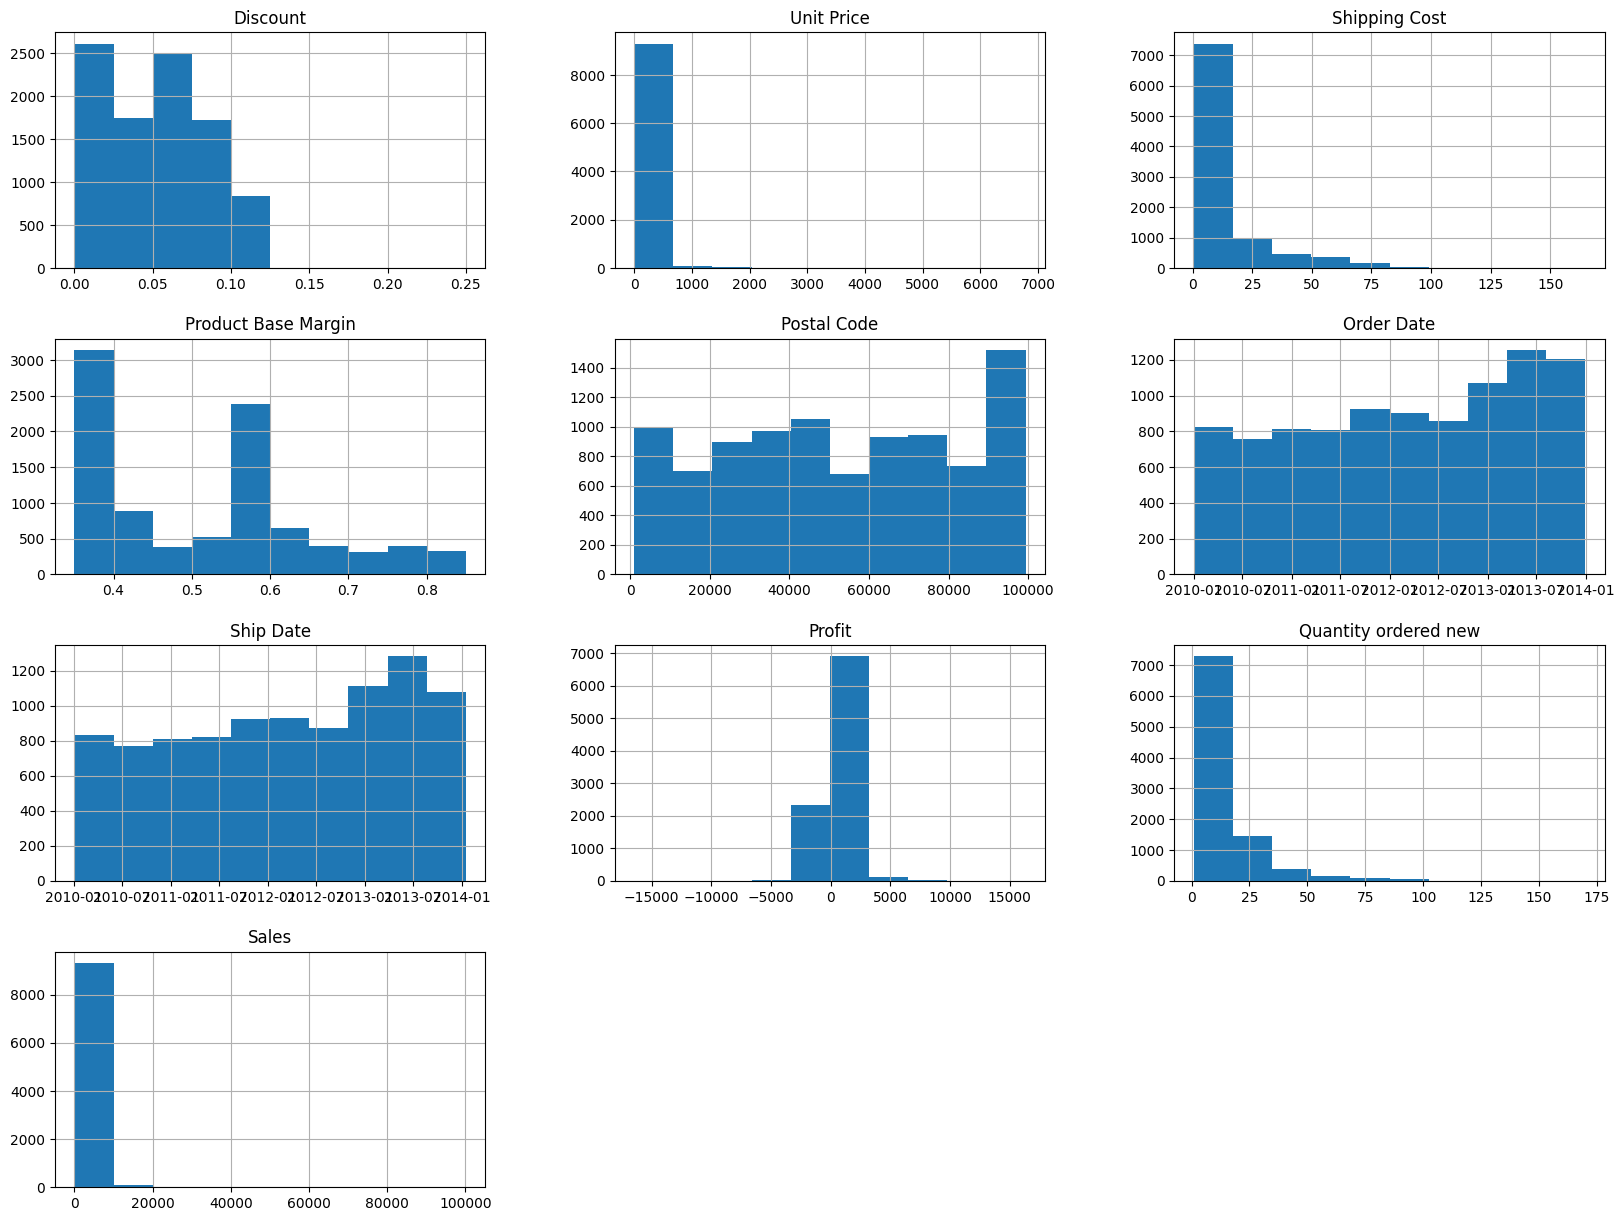

In [13]:

# Univariate analysis
data.hist(figsize=(20,15))
plt.show()


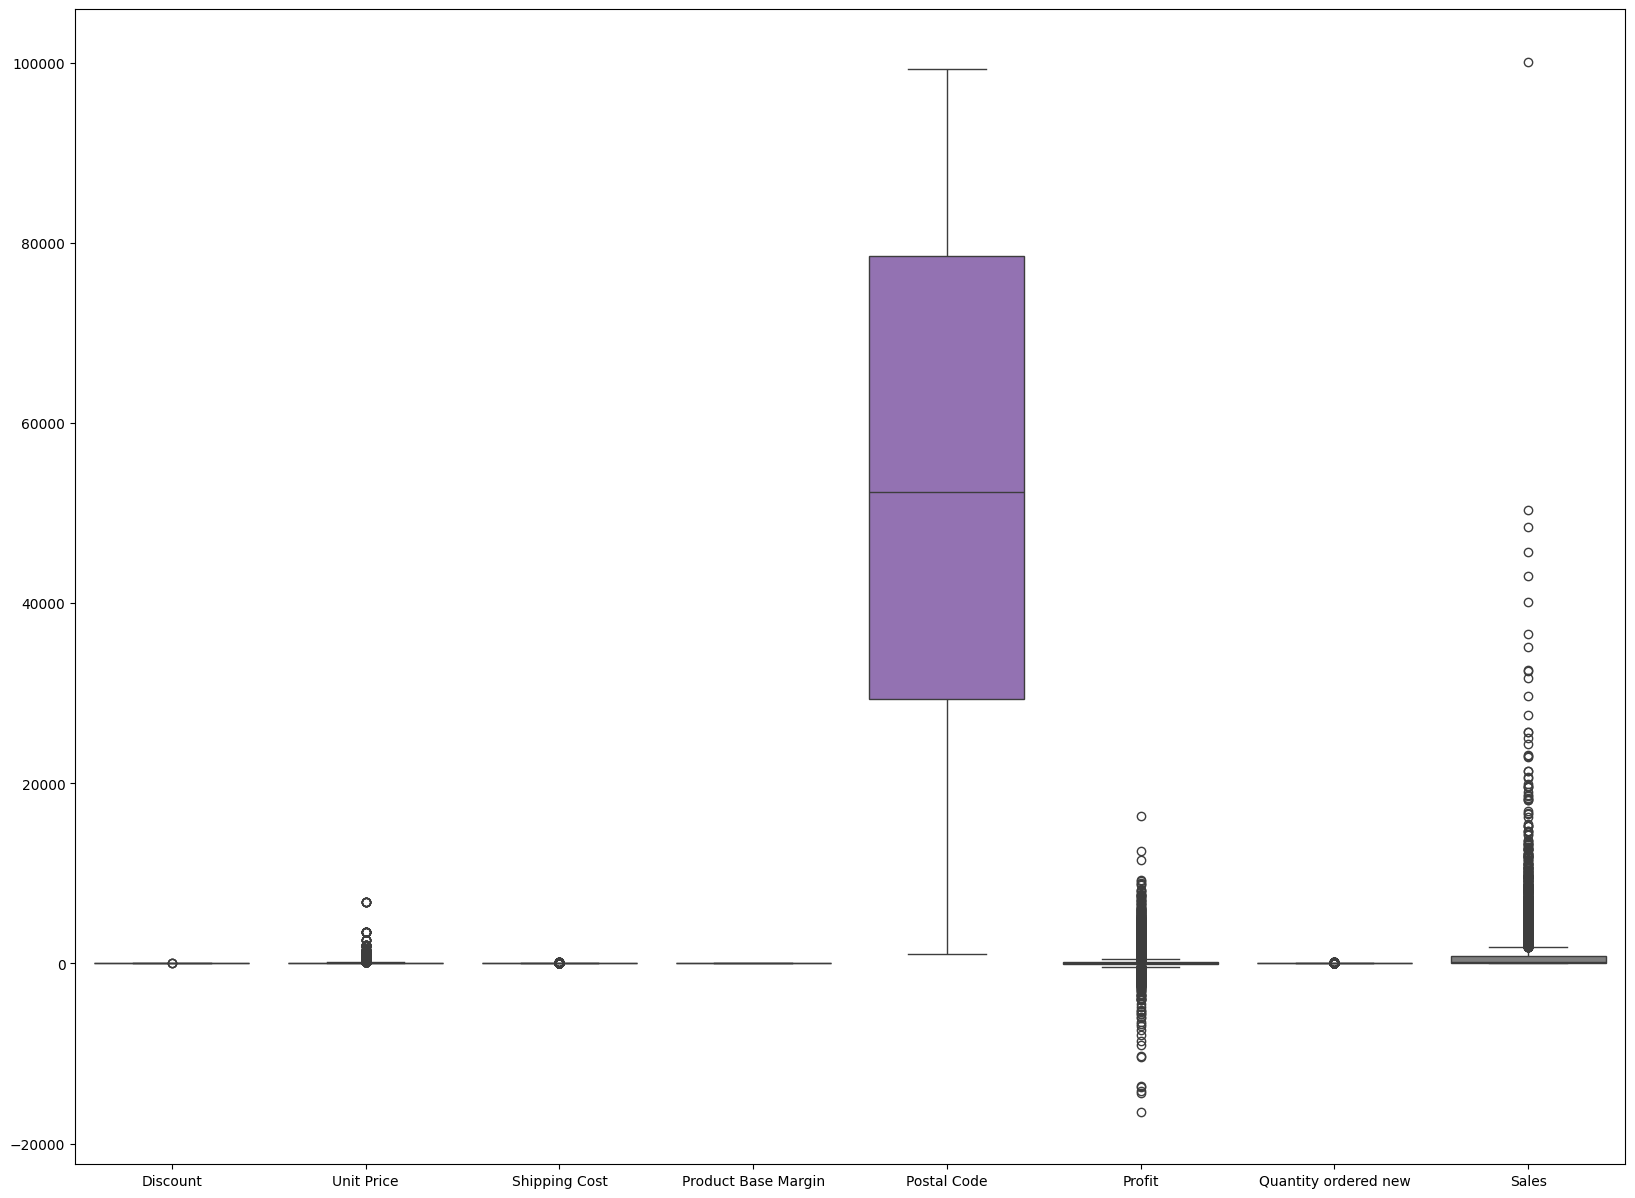

In [14]:
plt.figure(figsize=(20,15))
sns.boxplot(data=data)
plt.show()

<Axes: xlabel='Product Category', ylabel='count'>

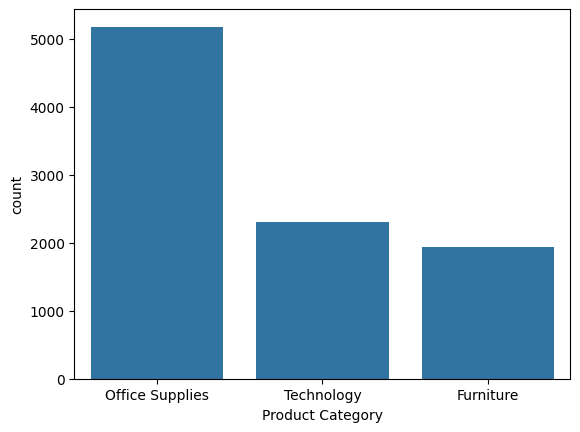

In [15]:
sns.countplot(x='Product Category',data=data)

In [16]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category',
       'Product Sub-Category', 'Product Container', 'Product Name',
       'Product Base Margin', 'Region', 'State or Province', 'City',
       'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

<Axes: xlabel='Ship Mode', ylabel='count'>

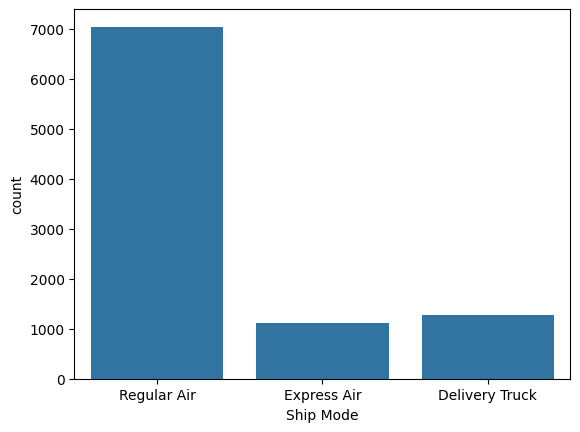

In [17]:
sns.countplot(x='Ship Mode',data=data)

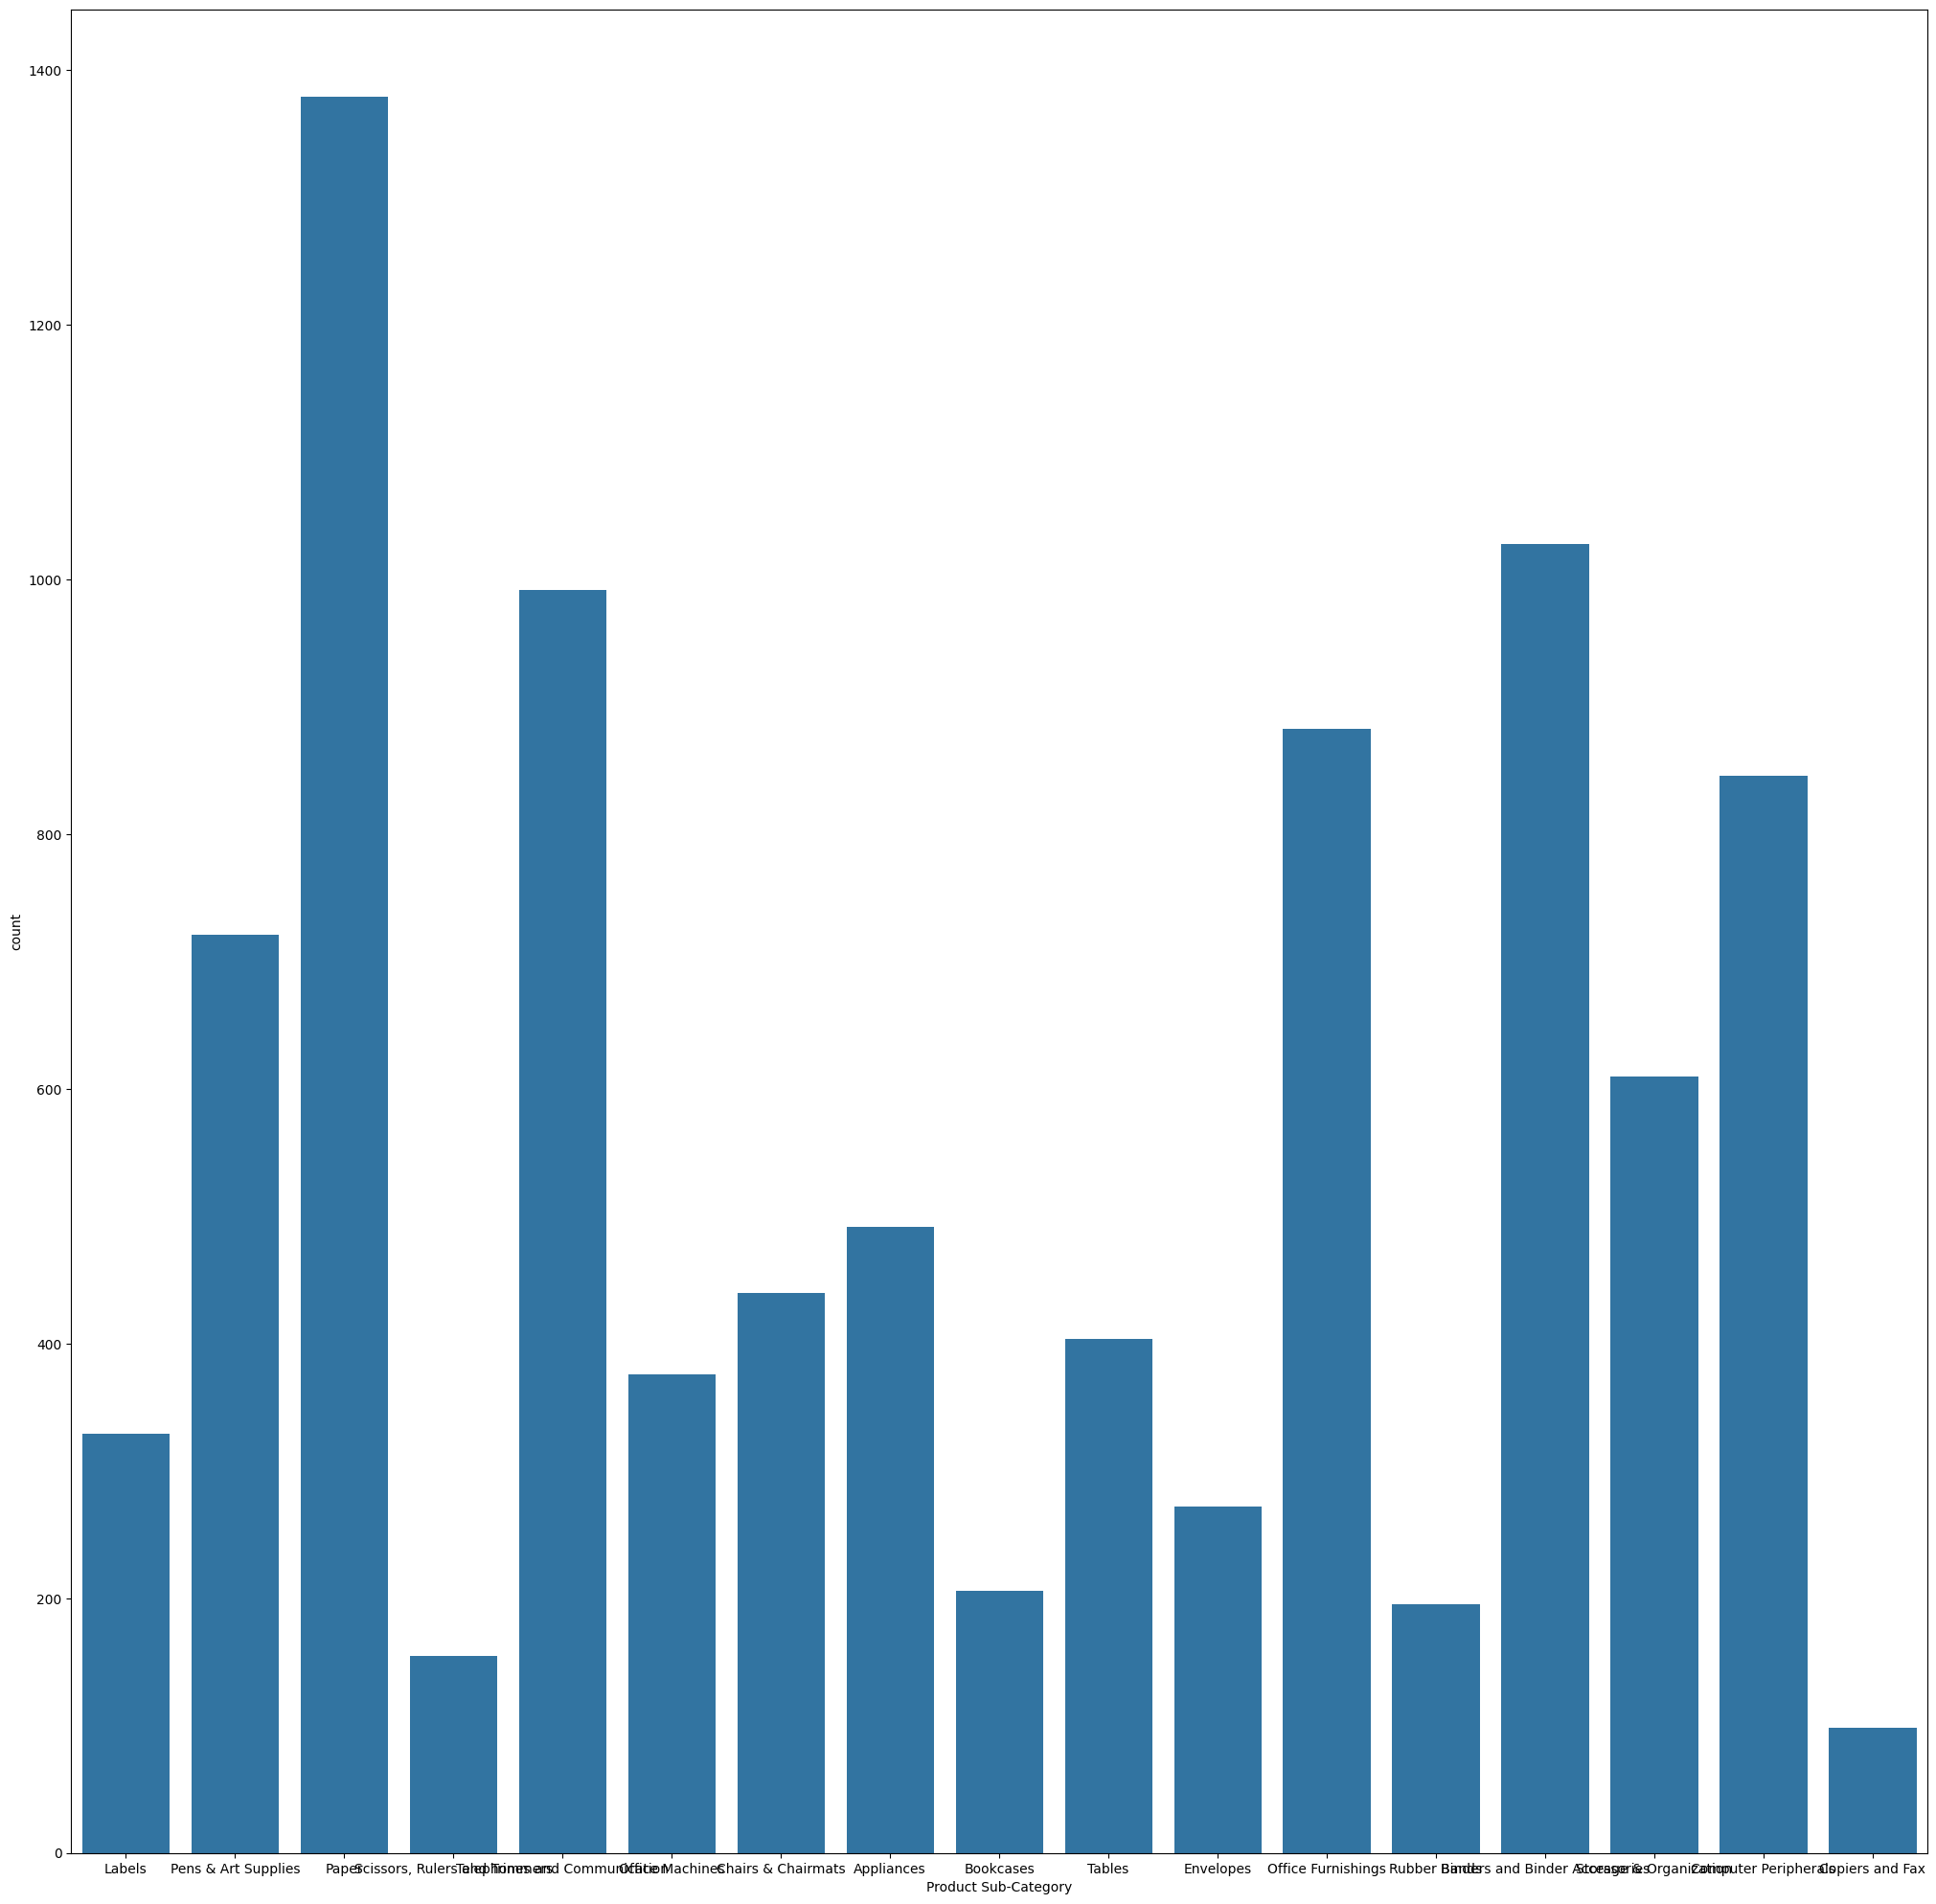

In [18]:
plt.figure(figsize=(25,25))
sns.countplot(x='Product Sub-Category',data=data)
plt.show()

<Axes: xlabel='Region', ylabel='count'>

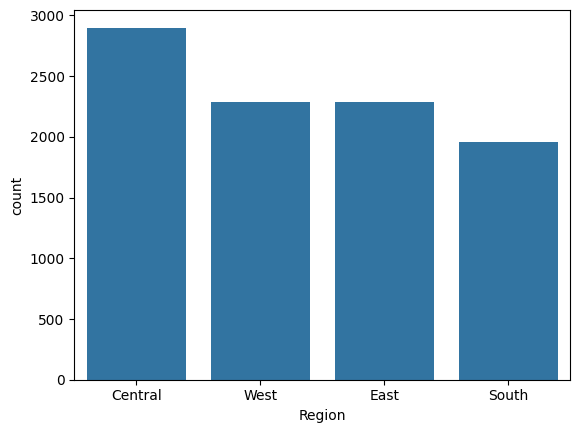

In [19]:
sns.countplot(x='Region',data=data)

In [20]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category',
       'Product Sub-Category', 'Product Container', 'Product Name',
       'Product Base Margin', 'Region', 'State or Province', 'City',
       'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

<Axes: xlabel='Sales', ylabel='Profit'>

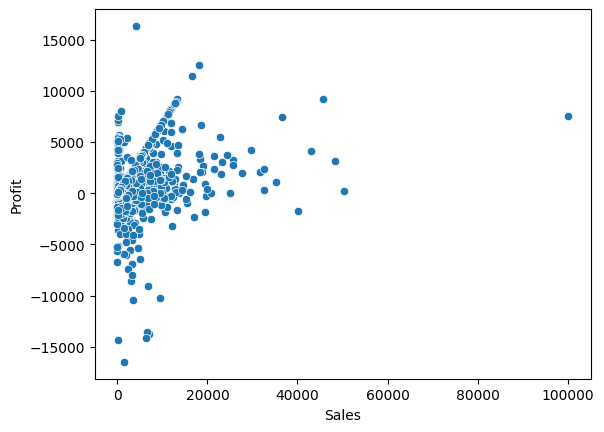

In [21]:
# Bivariate analysis
sns.scatterplot(x='Sales',y='Profit',data=data)

<Axes: xlabel='Product Category', ylabel='Sales'>

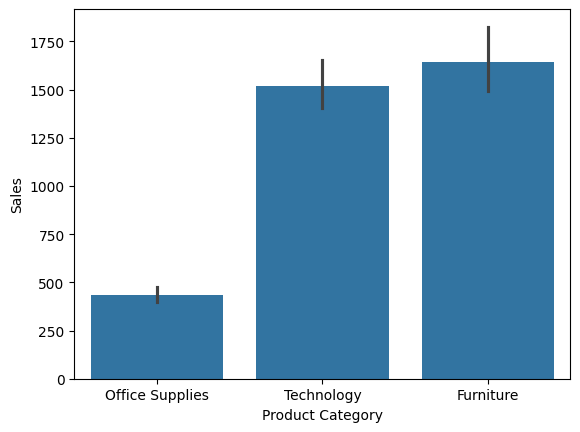

In [22]:
sns.barplot(x='Product Category',y='Sales',data=data)

<Axes: xlabel='Product Category', ylabel='Profit'>

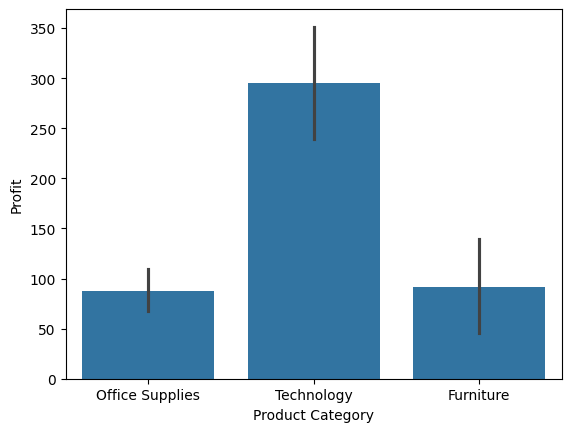

In [23]:
sns.barplot(x='Product Category',y='Profit',data=data)

<Axes: xlabel='Product Category', ylabel='Discount'>

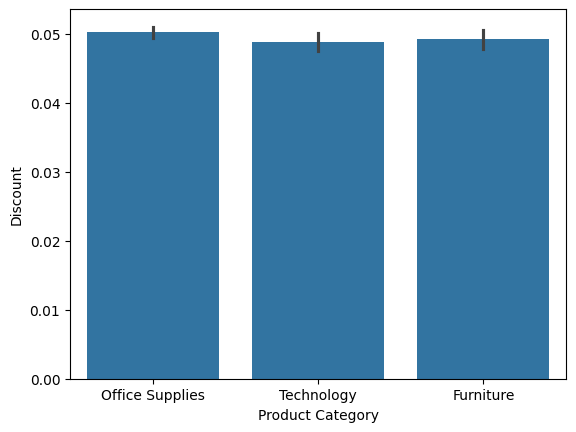

In [24]:
sns.barplot(x='Product Category',y='Discount',data=data)

<Axes: xlabel='Product Category', ylabel='Sales'>

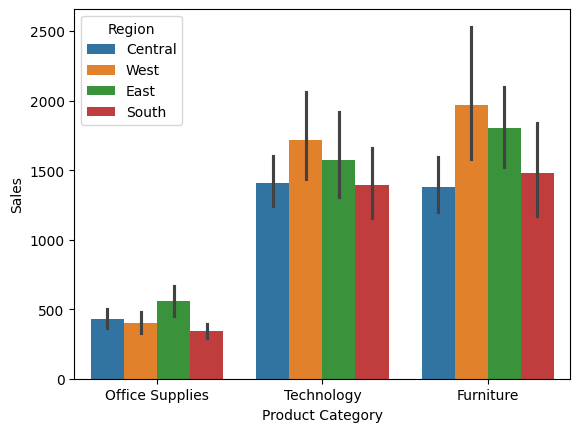

In [25]:
sns.barplot(x='Product Category',hue='Region',y='Sales',data=data)

<Axes: xlabel='Product Category', ylabel='Profit'>

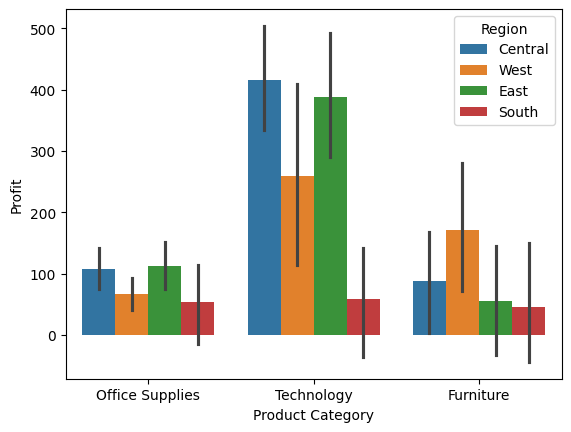

In [26]:
sns.barplot(x='Product Category',hue='Region',y='Profit',data=data)

<Axes: xlabel='Region', ylabel='Profit'>

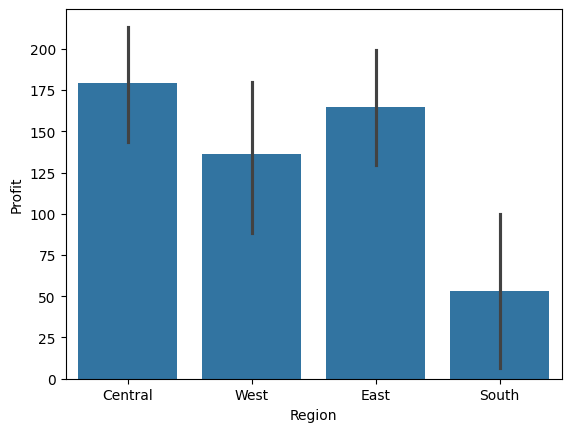

In [27]:
sns.barplot(x='Region',y='Profit',data=data)

In [28]:

# Summary statistics for key variables
data.describe() # summary statistics

,Discount,Unit Price,Shipping Cost,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000
mean,0.049628,88.303686,12.795142,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272
min,0.000000,0.990000,0.490000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000
25%,0.020000,6.480000,3.192500,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500
50%,0.050000,20.990000,6.050000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000
75%,0.080000,85.990000,13.990000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500
max,0.250000,6783.020000,164.730000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000
std,0.031798,281.540982,17.181203,0.134711,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818


In [29]:
# Grouped Statitics

grouped_data=data.groupby('Product Category')['Sales'].mean()
grouped_data.sort_values(ascending=False)

,Sales
Product Category,
Furniture,1644.399245
Technology,1520.320947
Office Supplies,435.886036


In [30]:
grouped_data=data.groupby('Product Category')['Profit'].mean()
grouped_data.sort_values(ascending=False)

,Profit
Product Category,
Technology,295.457563
Furniture,91.750801
Office Supplies,87.239957


In [31]:
grouped_data=data.groupby('Region')["Sales"].sum()
grouped_data.sort_values(ascending=False)

,Sales
Region,
Central,2540341.62
East,2422804.68
West,2391438.80
South,1597346.22


In [32]:
grouped_data=data.groupby('Product Category').agg({'Sales':['sum','mean','median','min','max','count','std','var','quantile'],'Profit':['sum','mean','median','min','max','count','std','var','quantile']})
grouped_data

Sales                                               \
                         sum         mean   median   min        max count   
Product Category                                                            
Furniture         3178623.74  1644.399245  602.360  2.77  100119.16  1933   
Office Supplies   2258325.55   435.886036   93.570  1.32   45737.33  5181   
Technology        3514982.03  1520.320947  562.505  5.46   50332.66  2312   

                                                             Profit  \
                          std           var quantile            sum   
Product Category                                                      
Furniture         3680.287385  1.354452e+07  602.360  177354.298188   
Office Supplies   1465.097920  2.146512e+06   93.570  451990.216492   
Technology        3173.584623  1.007164e+07  562.505  683097.884748   

                                                                       \
                        mean    median          min         max count   
Product Category                                                        
Furniture          91.750801  -3.84280 -13706.46400   7635.8436  1933   
Office Supplies    87.239957  -1.21688 -14369.12358  16332.4140  5181   
Technology        295.457563  45.36675 -16476.83800   9195.9750  2312   

                                                       
                          std           var  quantile  
Product Category                                       
Furniture         1044.354573  1.090676e+06  -3.84280  
Office Supplies    750.329484  5.629943e+05  -1.21688  
Technology        1363.777481  1.859889e+06  45.36675


### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [33]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions

#Grouping Sales data by region

Central_data=data[data['Region']=='Central']['Sales']
South_data=data[data['Region']=='South']['Sales']
East_data=data[data['Region']=='East']['Sales']
West_data=data[data['Region']=='West']['Sales']

#Performing pairwise ttest

t_stat,p_val=ttest_ind(Central_data,South_data)
print(f'Central v/s South Sales: t_stat value is {t_stat} and p_value is {p_val}')

t_stat,p_val=ttest_ind(Central_data, East_data)
print(f'Central v/s East Sales: t_stat value is {t_stat} and p_value is {p_val}')

t_stat,p_val=ttest_ind(Central_data, West_data)
print(f'Central v/s West Sales: t_stat value is {t_stat} and p_value is {p_val}')

t_stat,p_val=ttest_ind(South_data, East_data)
print(f'South v/s East Sales: t_stat value is {t_stat} and p_value is {p_val}')

t_stat,p_val=ttest_ind(South_data, West_data)
print(f'South v/s West Sales: t_stat value is {t_stat} and p_value is {p_val}')

t_stat,p_val=ttest_ind(East_data, West_data)
print(f'East v/s West Sales: t_stat value is {t_stat} and p_value is {p_val}')


Central v/s South Sales: t_stat value is 0.9586923386543068 and p_value is 0.33776153671163045
Central v/s East Sales: t_stat value is -2.7066878861206596 and p_value is 0.0068180648680200955
Central v/s West Sales: t_stat value is -2.3052600308736593 and p_value is 0.021191338860328448
South v/s East Sales: t_stat value is -3.089356698632667 and p_value is 0.0020188937964957026
South v/s West Sales: t_stat value is -2.650273410402939 and p_value is 0.00807256899923497
East v/s West Sales: t_stat value is 0.12701745344062249 and p_value is 0.8989321714456504


In [34]:
# Interpretation
# Pvalue for Central v/s South is 0.33 which is more than 0.05, therefore we accept null hypothesis here, meaning there is no difference in sales in the Central and South region
# Pvalue for Central v/s East is 0.006 which is less than 0.05, therefore we reject null hypothesis here, meaning there is a difference in sales in the Central and East region
# Pvalue for Central v/s West is 0.02 which is less than 0.05, therefore we reject null hypothesis here, meaning there is a difference in sales in the Central and West region
# Pvalue for South v/s East is 0.002 which is less than 0.05, therefore we reject null hypothesis here, meaning there is a difference in sales in the South and East region
# Pvalue for South v/s West is 0.008 which is more than 0.05, therefore we reject null hypothesis here, meaning there is a difference in sales in the South and West region
# Pvalue for East v/s West is 0.89 which is more than 0.05, therefore we accept null hypothesis here, meaning there is no difference in sales in the Central and South region

In [55]:
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [57]:
# Example: Chi-square test for independence between Ship Mode and Customer Segment
cross_tab=pd.crosstab(data['Ship Mode'],data['Customer Segment'])
chi2_stat,p_value,dof,expected=stats.chi2_contingency(cross_tab)
print(f'Chi-square statistic:{chi2_stat}')
print(f'p_value:{p_value}')
print(f'Degrees of freedom:{dof}')

if p_value<0.05:
  print('Reject null hypothesis as there is a dependence between Ship Mode and Customer Segment')
else:
  print('Accept null hypothesis as there is no dependence between Ship Mode and Customer Segment')


Chi-square statistic:1.6522944786735398
p_value:0.9487444717191827
Degrees of freedom:6
Accept null hypothesis as there is no dependence between Ship Mode and Customer Segment


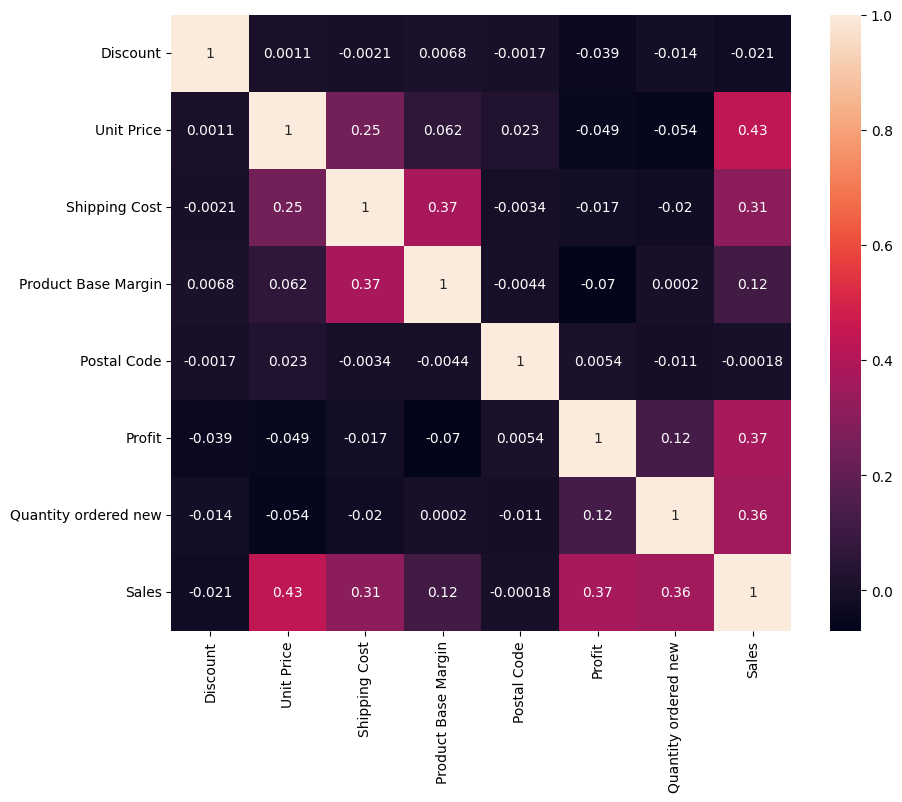

                      Discount  Unit Price  Shipping Cost  \
Discount              1.000000    0.001099      -0.002141   
Unit Price            0.001099    1.000000       0.246251   
Shipping Cost        -0.002141    0.246251       1.000000   
Product Base Margin   0.006772    0.061863       0.374733   
Postal Code          -0.001707    0.023104      -0.003406   
Profit               -0.039467   -0.048559      -0.017034   
Quantity ordered new -0.014062   -0.054415      -0.020198   
Sales                -0.021286    0.433984       0.310223   

                      Product Base Margin  Postal Code    Profit  \
Discount                         0.006772    -0.001707 -0.039467   
Unit Price                       0.061863     0.023104 -0.048559   
Shipping Cost                    0.374733    -0.003406 -0.017034   
Product Base Margin              1.000000    -0.004362 -0.070063   
Postal Code                     -0.004362     1.000000  0.005364   
Profit                          -0.070063 

In [36]:
# Selecting only numeric columns for correlation matrix
numeric=data.select_dtypes(include=['number'])
correlation_matrix=numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

print(correlation_matrix)





In [37]:
data.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category',
       'Product Sub-Category', 'Product Container', 'Product Name',
       'Product Base Margin', 'Region', 'State or Province', 'City',
       'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales'],
      dtype='object')

In [38]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [39]:
data.set_index('Order Date',inplace=True)

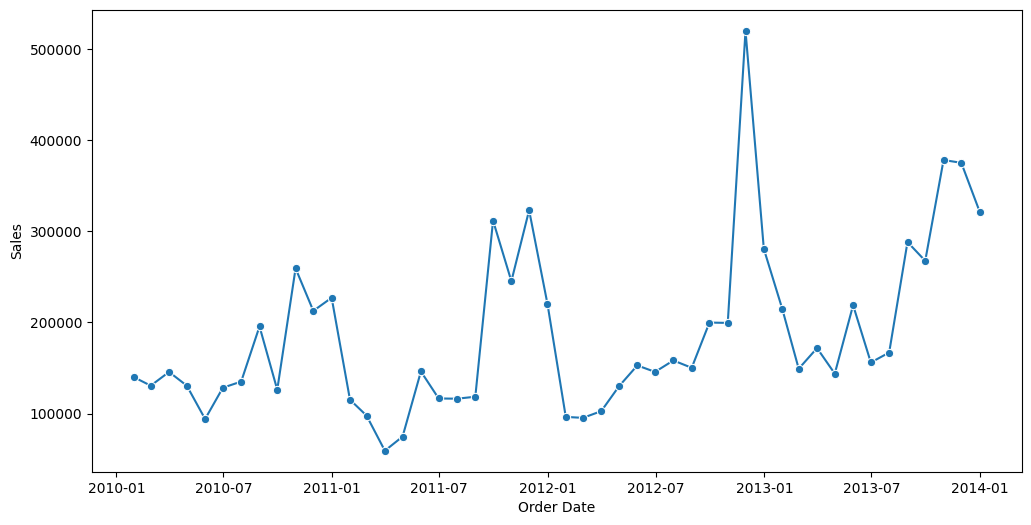

In [40]:

# Plotting sales trends over time
monthly_sales=(data.resample('M')['Sales'].sum()) #resampling monthly
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index,y=monthly_sales,marker='o')
plt.show()

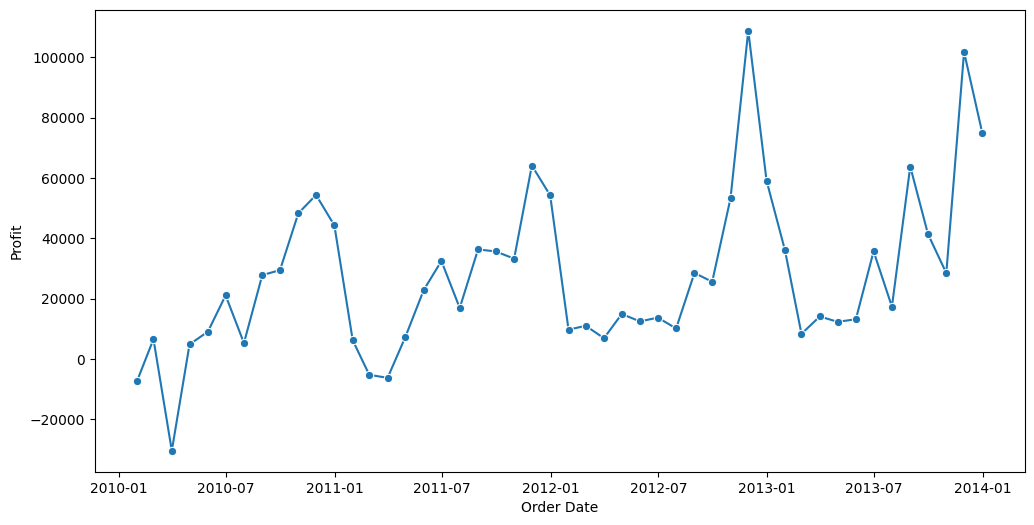

In [41]:

# Plotting profit trends over time

monthly_profit=(data.resample('M')['Profit'].sum()) #resampling monthly
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_profit.index,y=monthly_profit,marker='o')
plt.show()

In [42]:

# Identifying top-performing product categories based on total sales and profit
group=data.groupby("Product Category").agg({'Sales':'sum','Profit':'sum'})
group.sort_values(by='Sales',ascending=False)


,Sales,Profit
Product Category,,
Technology,3514982.03,683097.884748
Furniture,3178623.74,177354.298188
Office Supplies,2258325.55,451990.216492


<ipython-input-43-4a37de96e7f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category',y='Sales',data=data,palette='Set1')


<Axes: xlabel='Product Category', ylabel='Sales'>

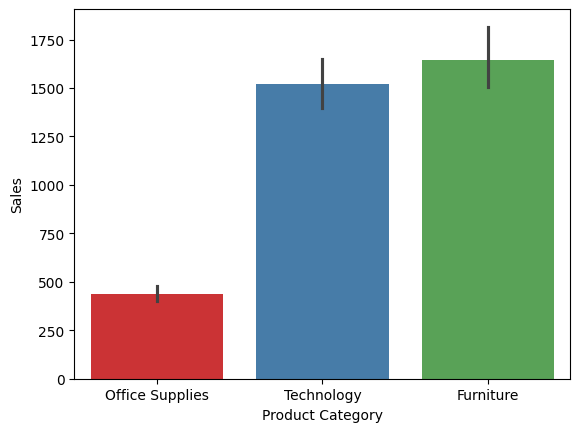

In [43]:
# Plotting total sales by product category

sns.barplot(x='Product Category',y='Sales',data=data,palette='Set1')








<ipython-input-44-5815cab0d638>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category',y='Profit',data=data,palette='Set2')


<Axes: xlabel='Product Category', ylabel='Profit'>

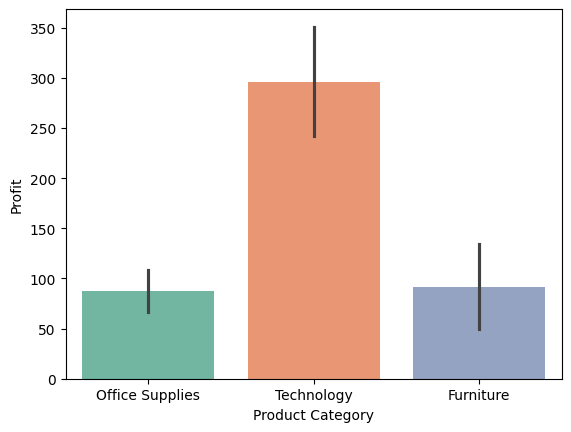

In [44]:
# Plotting total profit by product category

sns.barplot(x='Product Category',y='Profit',data=data,palette='Set2')

In [45]:

# Generating summary statistics for each region
region=data.groupby('Region').agg({'Sales':['sum','mean','median','min','max','count','std','var','quantile'],'Profit':['sum','mean','median','min','max','count','std','var','quantile'],'Discount':['sum','mean','median','min','max','count','std','var','quantile']})
region





Sales                                                            \
                sum         mean   median   min        max count          std   
Region                                                                          
Central  2540341.62   876.282035  203.370  2.24   32589.59  2899  2041.342685   
East     2422804.68  1058.455518  225.140  1.32   48418.58  2289  2802.669839   
South    1597346.22   817.475036  180.375  2.66   40136.93  1954  2173.877698   
West     2391438.80  1047.039755  204.730  1.62  100119.16  2284  3258.451329   

                                       Profit  ...          Discount  \
                  var quantile            sum  ... quantile      sum   
Region                                         ...                     
Central  4.167080e+06  203.370  519825.567067  ...   6.1400   143.06   
East     7.854958e+06  225.140  377566.186045  ...   2.0672   114.45   
South    4.725744e+06  180.375  104201.192420  ...  -3.1171    96.53   
West     1.061751e+07  204.730  310849.453897  ...   2.7080   113.75   

                                                                        
             mean median  min   max count       std       var quantile  
Region                                                                  
Central  0.049348   0.05  0.0  0.25  2899  0.031932  0.001020     0.05  
East     0.050000   0.05  0.0  0.10  2289  0.031824  0.001013     0.05  
South    0.049401   0.05  0.0  0.10  1954  0.031678  0.001003     0.05  
West     0.049803   0.05  0.0  0.10  2284  0.031722  0.001006     0.05  

[4 rows x 27 columns]

In [46]:

# Visualizing the correlation between sales and profit

Sales_Profit=data[['Sales','Profit']]
Sales_Profit_corr=Sales_Profit.corr()
Sales_Profit_corr


,Sales,Profit
Sales,1.000000,0.371583
Profit,0.371583,1.000000


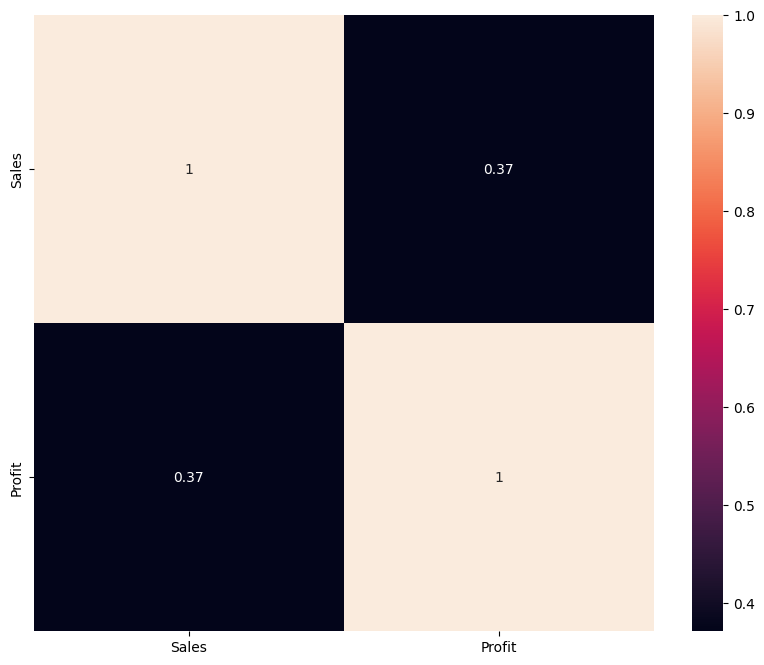

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(Sales_Profit_corr,annot=True)
plt.show()

In [48]:

# Analyzing seasonal sales trends
seasonal_sales=(data.resample('Y')['Sales'].sum())

seasonal_sales



,Sales
Order Date,
2010-12-31,1924332.88
2011-12-31,1944507.43
2012-12-31,2230731.18
2013-12-31,2852359.83


In [49]:
# Grouping sales data by month and year

monthly_sales=(data.resample('M')['Sales'].sum())
monthly_sales

,Sales
Order Date,
2010-01-31,139730.46
2010-02-28,130534.07
2010-03-31,145615.73
2010-04-30,130542.99
2010-05-31,93938.81
2010-06-30,128304.34
2010-07-31,135036.46
2010-08-31,195567.40
2010-09-30,126080.94


<ipython-input-50-f8e4ffea059a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode',y='Sales',palette='Set3',data=data)


<Axes: xlabel='Ship Mode', ylabel='Sales'>

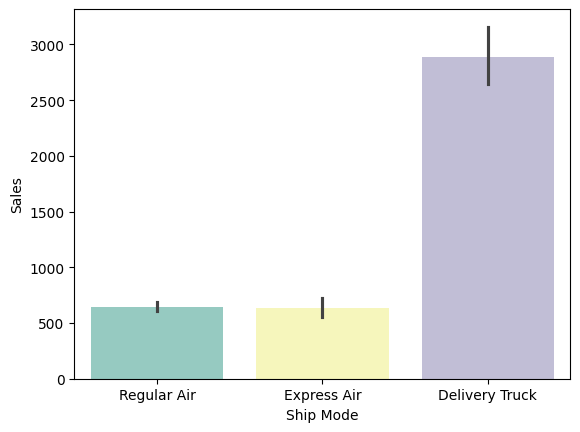

In [50]:

# Comparing sales across different ship modes

sns.barplot(x='Ship Mode',y='Sales',palette='Set3',data=data)




In [51]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month








